## Sentiment Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Prozhe Karshenasi/traintrain.csv')

Mounted at /content/drive


In [ ]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

In [ ]:
tweet_df = df[['text','sentiment']]
print(tweet_df.shape)
tweet_df.head(5)

(31014, 2)


,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
tweet_df = tweet_df[tweet_df['sentiment'] != 'neutral']
print(tweet_df.shape)
tweet_df.head(5)

(18467, 2)


,text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
6,2am feedings for the baby are fun when he is a...,positive


In [ ]:
tweet_df["sentiment"].value_counts()

positive    9685
negative    8782
Name: sentiment, dtype: int64

In [ ]:
sentiment_label = tweet_df.sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 0, 1, 1]),
 Index(['negative', 'positive'], dtype='object'))

In [ ]:
tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet.astype('str'))
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet.astype('str'))
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
print(tokenizer.word_index)

{'i': 1, 'to': 2, 'the': 3, 'a': 4, 'my': 5, 'it': 6, 'you': 7, 'and': 8, 'is': 9, 's': 10, 'for': 11, 'in': 12, 'that': 13, 'of': 14, 't': 15, 'so': 16, 'me': 17, 'have': 18, 'on': 19, 'day': 20, 'm': 21, 'just': 22, 'good': 23, 'but': 24, 'with': 25, 'be': 26, 'was': 27, 'not': 28, 'all': 29, 'at': 30, 'this': 31, 'love': 32, 'can': 33, 'now': 34, 'happy': 35, 'like': 36, 'out': 37, 'up': 38, 'are': 39, 'get': 40, 'no': 41, 'too': 42, 'your': 43, 'go': 44, 'today': 45, 'work': 46, 'really': 47, 'do': 48, 'got': 49, 'http': 50, 'going': 51, 'we': 52, 'thanks': 53, 'im': 54, 'u': 55, 'one': 56, 'had': 57, 'from': 58, 'what': 59, 'am': 60, 'its': 61, 'time': 62, 'about': 63, 'there': 64, 'lol': 65, 'know': 66, 'don': 67, 'will': 68, 'great': 69, 'back': 70, 'much': 71, 'night': 72, 'miss': 73, 'com': 74, 'they': 75, 'see': 76, 'hope': 77, 'oh': 78, 'well': 79, 'new': 80, 'some': 81, 'when': 82, 'as': 83, 'think': 84, 'fun': 85, 'if': 86, 'still': 87, 'sad': 88, 'how': 89, '2': 90, 'he':

In [ ]:
print(tweet[0])
print(encoded_docs[0])

 Sooo SAD I will miss you here in San Diego!!!
[358, 88, 1, 68, 73, 7, 97, 12, 1374, 2169]


In [ ]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  358   88    1   68   73    7
   97 

In [ ]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           650144    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 666,795
Trainable params: 666,795
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
462/462 [==============================] - 171s 363ms/step - loss: 0.4829 - accuracy: 0.7525 - val_loss: 0.3208 - val_accuracy: 0.8649
Epoch 2/5
462/462 [==============================] - 167s 362ms/step - loss: 0.3011 - accuracy: 0.8784 - val_loss: 0.2924 - val_accuracy: 0.8803
Epoch 3/5
462/462 [==============================] - 163s 353ms/step - loss: 0.2514 - accuracy: 0.9015 - val_loss: 0.2873 - val_accuracy: 0.8760
Epoch 4/5
462/462 [==============================] - 165s 358ms/step - loss: 0.2215 - accuracy: 0.9163 - val_loss: 0.2903 - val_accuracy: 0.8787
Epoch 5/5
462/462 [==============================] - 168s 363ms/step - loss: 0.2234 - accuracy: 0.9140 - val_loss: 0.3023 - val_accuracy: 0.8749


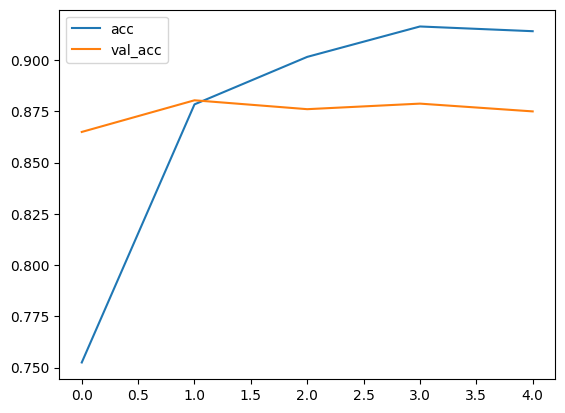

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

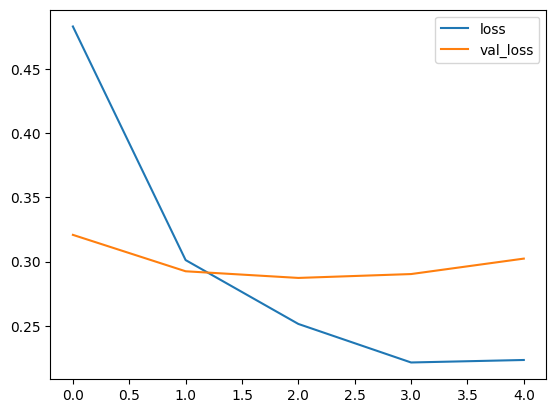

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [ ]:
test_sentence1 = "are u sad?."
predict_sentiment(test_sentence1)

test_sentence2 = "I am sad mom!"
predict_sentiment(test_sentence2)

1/1 [==============================] - 1s 544ms/step
Predicted label:  negative
1/1 [==============================] - 0s 48ms/step
Predicted label:  negative


In [ ]:
#second approach

In [ ]:
trainy = sentiment_label[0][0:13000]
testy = sentiment_label[0][13000:]

In [ ]:
trainx = padded_sequence[0:13000, :]
testx = padded_sequence[13000:, :]

In [ ]:
import numpy as np

In [ ]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           650144    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 666,795
Trainable params: 666,795
Non-trainable params: 0
________________________________________________

In [ ]:
history = model.fit(trainx,trainy,validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
163/163 [==============================] - 73s 429ms/step - loss: 0.2087 - accuracy: 0.6650 - val_loss: 0.1360 - val_accuracy: 0.8158
Epoch 2/5
163/163 [==============================] - 69s 427ms/step - loss: 0.1091 - accuracy: 0.8530 - val_loss: 0.1058 - val_accuracy: 0.8496
Epoch 3/5
163/163 [==============================] - 72s 443ms/step - loss: 0.0847 - accuracy: 0.8890 - val_loss: 0.0974 - val_accuracy: 0.8731
Epoch 4/5
163/163 [==============================] - 69s 426ms/step - loss: 0.0669 - accuracy: 0.9141 - val_loss: 0.0975 - val_accuracy: 0.8708
Epoch 5/5
163/163 [==============================] - 68s 420ms/step - loss: 0.0591 - accuracy: 0.9247 - val_loss: 0.0981 - val_accuracy: 0.8685


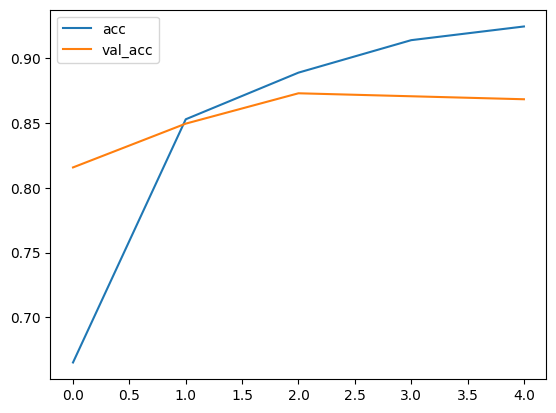

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

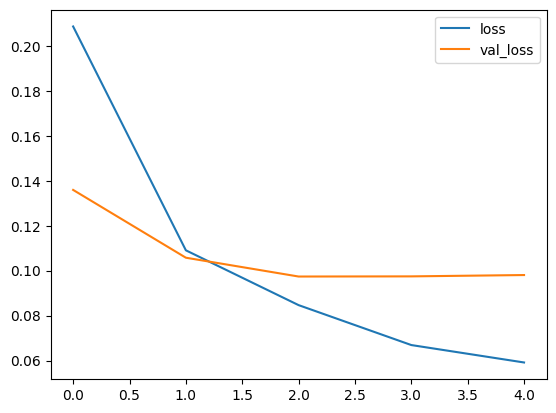

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [ ]:
preds = model.predict(testx)

171/171 [==============================] - 10s 56ms/step


In [ ]:
preds

array([[0.17899524],
       [0.9624737 ],
       [0.9999626 ],
       ...,
       [0.2556409 ],
       [0.97099483],
       [0.9756979 ]], dtype=float32)

In [ ]:
for i in range(len(preds)):
    if(preds[i] > 1.25):
        preds[i] = 2
    elif(preds[i] > 0.65 and preds[i] <= 1.25):
        preds[i] = 1

    else:
        preds[i] = 0


In [ ]:
testy[200:500]

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
preds[1]

array([1.], dtype=float32)

In [ ]:
c = 0
for i in range(len(preds)):
    if(preds[i] == testy[i]):
        c = c+1

av = (c/len(preds))*100
print(av)

87.19590268886044


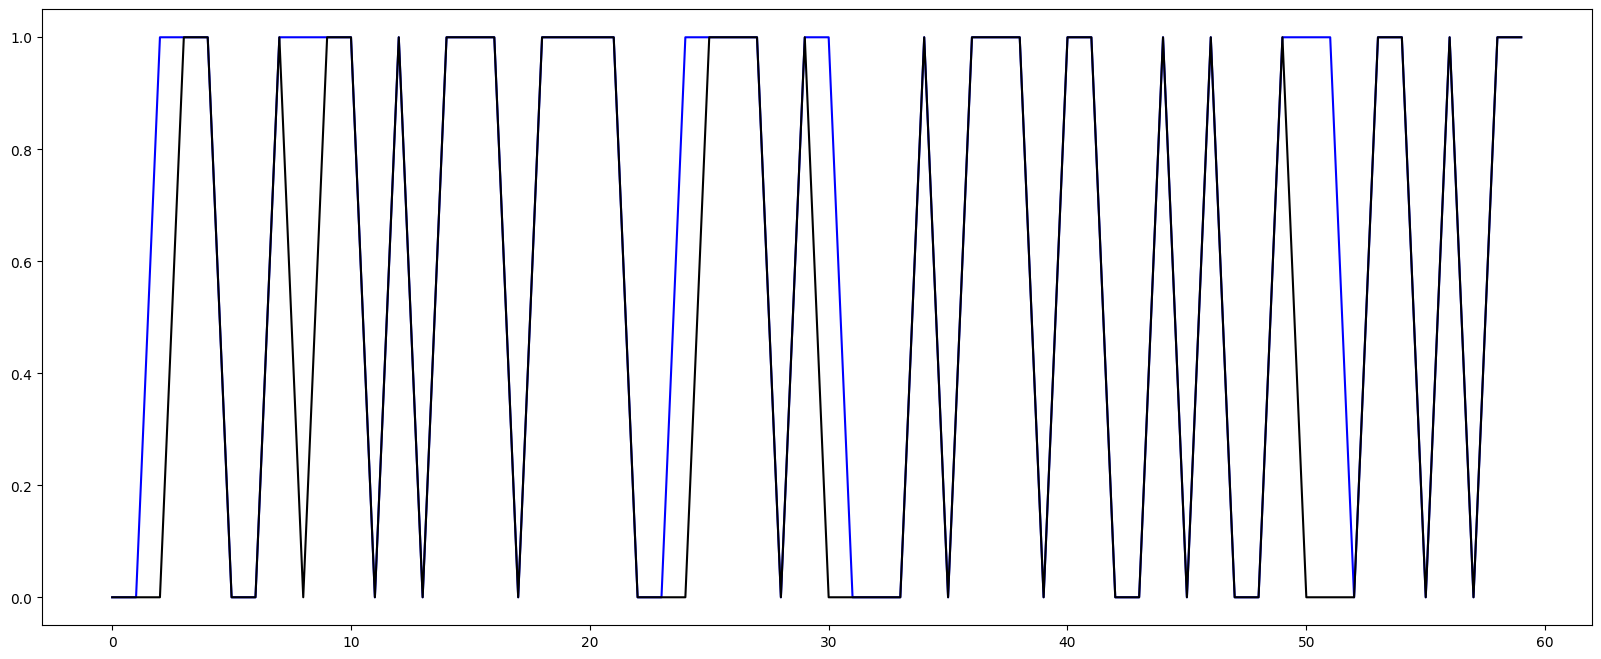

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,8))

lenn = len(testy) - 60

pyplot.plot(testy[lenn:], 'blue')
pyplot.plot(preds[lenn:], 'black')



pyplot.show()